In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

In [2]:
# y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자열을 categorical 값으로 전환

In [3]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
# Classification Tree (분류 나무)
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier

dtc = tree.DecisionTreeClassifier(criterion='gini', 
                                  max_depth=3,  # 나무의 깊이=3으로 지정
                                  random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

분류나무에서 중요한 것은 노드가 어떤 변수의 어떤 값에 의해서 만들어졌는지를 보여주는 나무그림이다.

[Text(111.60000000000001, 190.26, 'petal width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = Setosa'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Setosa'),
 Text(167.4, 135.9, 'petal length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = Versicolor'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Versicolor'),
 Text(223.20000000000002, 81.53999999999999, 'petal width <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]\nclass = Virginica'),
 Text(167.4, 27.180000000000007, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Versicolor'),
 Text(279.0, 27.180000000000007, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]\nclass = Virginica')]

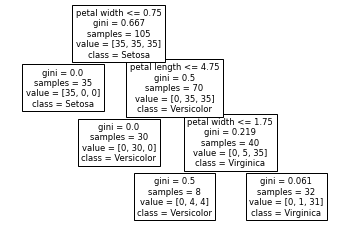

In [5]:
#tree.plot_tree(dtc.fit(X_train,y_train))
tree.plot_tree(result, 
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [6]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9777777777777777


In [7]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [8]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/zoeyki/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    cffi-1.14.0                |   py38hb5b8e2f_0         216 KB
    fontconfig-2.13.1          |       ha9ee91d_0         211 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    glib-2.63.1                |       hd977a24_0         2.6 MB
    graphite2-1.3.14           |       h38d11af_0          80 KB
    graphviz-2.40.1            |       hefbbd9

In [10]:
# 현재 경로 확인
import os
os.getcwd()

'/Users/zoeyki/[21-2] 통계적머신러닝'

In [13]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

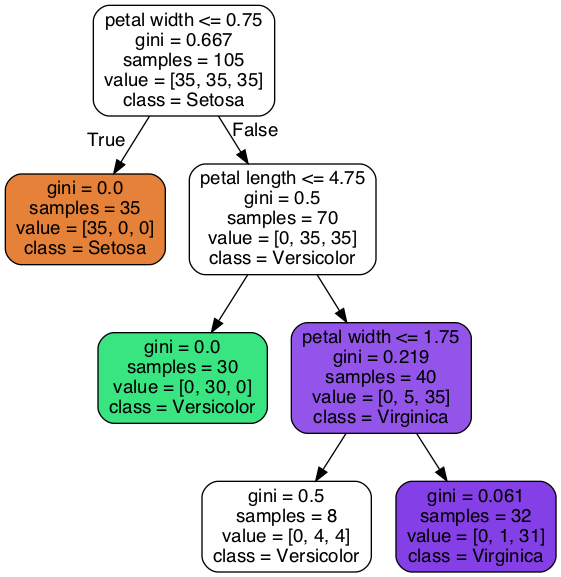

In [14]:
from IPython.display import Image 
Image(graph.create_png())